## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [10]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [16]:
from nndl.neural_net import TwoLayerNet

In [12]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [18]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231233889892e-08


### Forward pass loss

In [19]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [20]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.9632227682005116e-10
b2 max relative error: 1.2482660547101085e-09
W1 max relative error: 1.2832874456864775e-09
b1 max relative error: 3.1726806716844575e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587765906


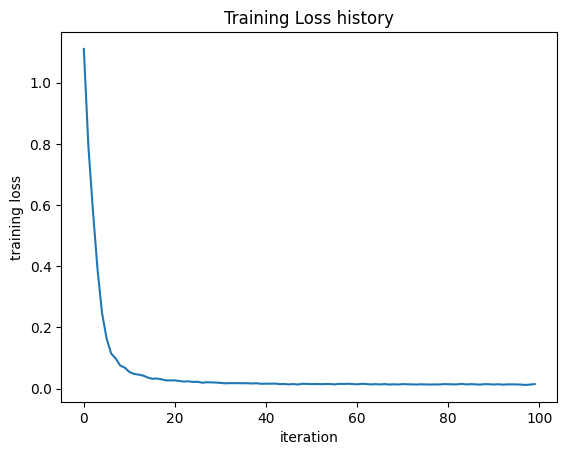

In [21]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [23]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/krishpatel/Desktop/HW3_code/utils/datasets/cifar-10-batches-py' # remember to use correct path
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [24]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.302120159207236
iteration 200 / 1000: loss 2.2956136007408703
iteration 300 / 1000: loss 2.2518259043164135
iteration 400 / 1000: loss 2.188995235046776
iteration 500 / 1000: loss 2.1162527791897747
iteration 600 / 1000: loss 2.064670827698217
iteration 700 / 1000: loss 1.9901688623083942
iteration 800 / 1000: loss 2.002827640124685
iteration 900 / 1000: loss 1.9465176817856502
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [25]:
stats['train_acc_history']

[0.095, 0.15, 0.25, 0.25, 0.315]

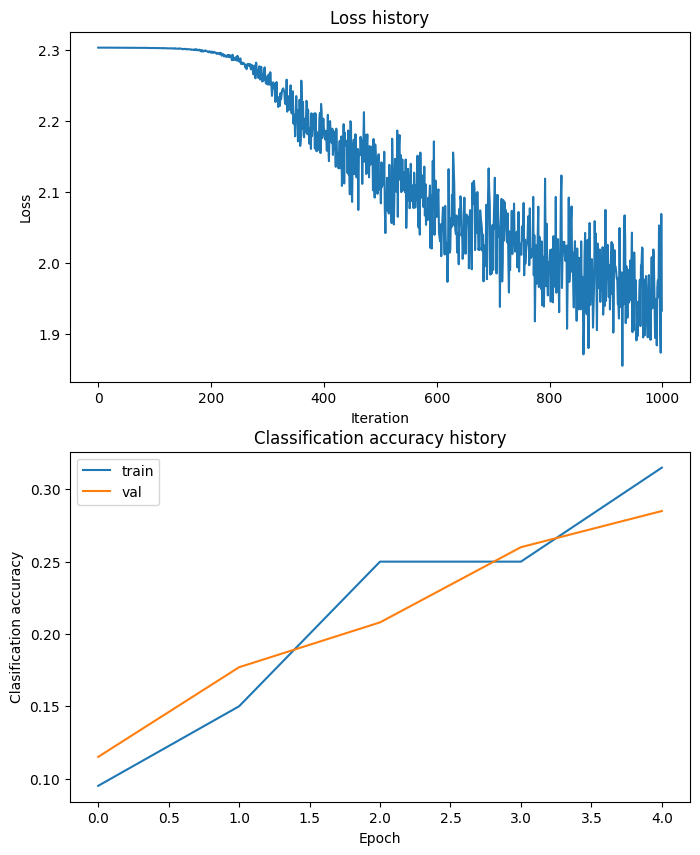

In [27]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].plot(stats['loss_history'])
ax[0].set_title('Loss history')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')

ax[1].plot(stats['train_acc_history'], label='train')
ax[1].plot(stats['val_acc_history'], label='val')
ax[1].set_title('Classification accuracy history')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Clasification accuracy')
ax[1].legend()
plt.show()

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) According to the Loss Vs Iteration graph, it appears that the loss doesn't decrease by a large factorand instead stays almost flat, hinting that the learning rate might be too low. Also, both the training and validation sets show similar but poor accuracy, and haven't reached convergence or stability. This suggests we might need more iterations to see improvements.

(2) To improve accuracy, we need to adjust certain settings such as our learning rate parameter, the iteration count, how much we penalize complex models (regularization coefficient), and the number of samples per batch (batch size).

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [41]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

iteration_numbers = np.arange(2, 4) * 10**3
reg_coefs = np.arange(0.1, 0.25, 0.05)
learning_rates = np.power(10, -np.arange(3.0, 4.1, 0.1))
batch_sizes = np.arange(200, 260, 10)

best_val= 0

for iteration_number in iteration_numbers:
    for reg_coef in reg_coefs:
        for batch_size in batch_sizes:
            for learning_rate in learning_rates:
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,num_iters=iteration_number, batch_size=batch_size, learning_rate=learning_rate, learning_rate_decay=0.95,reg=reg_coef, verbose=False)
                val_acc = (net.predict(X_val)==y_val).mean()
                print("Training accuracy for this iteration:", (net.predict(X_train) == y_train).mean())
                print("Validation accuracy for this iteration:", val_acc)
                print("n_iteration:", iteration_number)
                print("reg_coef:", reg_coef)
                print("batch_size:", batch_size)
                print("learning_rate:", learning_rate)
                if best_val < val_acc:
                    best_val = val_acc
                if val_acc >= 0.5:
                    best_net = net
                    break
            else:
                continue
            break
        else:
            continue
        break
    else:
        continue
    break

       
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
if best_net is not None:
    val_acc = (best_net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
else:
    print("No best network found.")


Training accuracy for this iteration: 0.5378979591836734
Validation accuracy for this iteration: 0.492
n_iteration: 2000
reg_coef: 0.1
batch_size: 200
learning_rate: 0.001
Training accuracy for this iteration: 0.5268979591836734
Validation accuracy for this iteration: 0.493
n_iteration: 2000
reg_coef: 0.1
batch_size: 200
learning_rate: 0.0007943282347242813
Training accuracy for this iteration: 0.5143469387755102
Validation accuracy for this iteration: 0.484
n_iteration: 2000
reg_coef: 0.1
batch_size: 200
learning_rate: 0.000630957344480193
Training accuracy for this iteration: 0.5006734693877551
Validation accuracy for this iteration: 0.494
n_iteration: 2000
reg_coef: 0.1
batch_size: 200
learning_rate: 0.000501187233627272
Training accuracy for this iteration: 0.48653061224489796
Validation accuracy for this iteration: 0.465
n_iteration: 2000
reg_coef: 0.1
batch_size: 200
learning_rate: 0.0003981071705534969
Training accuracy for this iteration: 0.467734693877551
Validation accuracy f

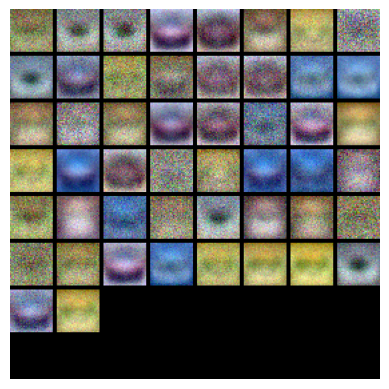

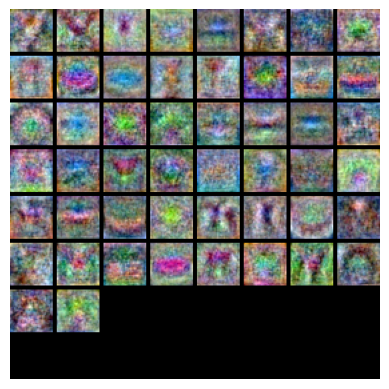

In [42]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The best net seems to preserve more features about the visual charactersistics. However in the subopt, all of the features seem to be much more blurred(looks like a gaussian blue), thus suggesting that the latesr don't do well at preserving the features.

## Evaluate on test set 

In [43]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.489
